Pixeltests School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Logistic Regression
- do train/validate/test split
- begin with baselines for classification
- express and explain the intuition and interpretation of Logistic Regression
- use sklearn.linear_model.LogisticRegression to fit and interpret Logistic Regression models

Logistic regression is the baseline for classification models, as well as a handy way to predict probabilities (since those too live in the unit interval). While relatively simple, it is also the foundation for more sophisticated classification techniques such as neural networks (many of which can effectively be thought of as networks of logistic models).

### Setup

Run the code cell below. You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab.

Libraries:
- category_encoders
- numpy
- pandas
- scikit-learn

# Do train/validate/test split

In [66]:
import pandas as pd
import numpy as np
import sys

In [67]:
if 'google.colab' in sys.modules :
   DATA_PATH = 'https://raw.githubusercontent.com/pixeltests/datasets/main/'
   !pip install category_encoders==2.*

else :
    DATA_PATH = '../data/'

In [68]:
train = pd.read_csv(DATA_PATH + 'titanic/train.csv')
test = pd.read_csv(DATA_PATH + 'titanic/test.csv')

In [69]:
train.shape , test.shape

((891, 12), (418, 11))

> One great thing about Kaggle competitions is that they force you to think about validation sets more rigorously (in order to do well). For those who are new to Kaggle, it is a platform that hosts machine learning competitions. Kaggle typically breaks the data into two sets you can download:
>
> 1. a **training set**, which includes the _independent variables,_ as well as the _dependent variable_ (what you are trying to predict).
>
> 2. a **test set**, which just has the _independent variables._ You will make predictions for the test set, which you can submit to Kaggle and get back a score of how well you did.
>
> This is the basic idea needed to get started with machine learning, but to do well, there is a bit more complexity to understand. **You will want to create your own training and validation sets (by splitting the Kaggle “training” data). You will just use your smaller training set (a subset of Kaggle’s training data) for building your model, and you can evaluate it on your validation set (also a subset of Kaggle’s training data) before you submit to Kaggle.**
>
> The most important reason for this is that Kaggle has split the test data into two sets: for the public and private leaderboards. The score you see on the public leaderboard is just for a subset of your predictions (and you don’t know which subset!). How your predictions fare on the private leaderboard won’t be revealed until the end of the competition. The reason this is important is that you could end up overfitting to the public leaderboard and you wouldn’t realize it until the very end when you did poorly on the private leaderboard. Using a good validation set can prevent this. You can check if your validation set is any good by seeing if your model has similar scores on it to compared with on the Kaggle test set. ...
>
> Understanding these distinctions is not just useful for Kaggle. In any predictive machine learning project, you want your model to be able to perform well on new data.

In [70]:
from sklearn.model_selection import train_test_split

train,val = train_test_split(train , random_state=42, train_size=0.47)
train_test_split(train , random_state=42)

[     PassengerId  Survived  Pclass                          Name     Sex  \
 586          587         0       2       Jarvis, Mr. John Denzil    male   
 768          769         0       3           Moran, Mr. Daniel J    male   
 855          856         1       3    Aks, Mrs. Sam (Leah Rosen)  female   
 401          402         0       3               Adams, Mr. John    male   
 287          288         0       3          Naidenoff, Mr. Penko    male   
 ..           ...       ...     ...                           ...     ...   
 190          191         1       2           Pinsky, Mrs. (Rosa)  female   
 857          858         1       1        Daly, Mr. Peter Denis     male   
 217          218         0       2  Jacobsohn, Mr. Sidney Samuel    male   
 454          455         0       3           Peduzzi, Mr. Joseph    male   
 844          845         0       3           Culumovic, Mr. Jeso    male   
 
       Age  SibSp  Parch    Ticket     Fare Cabin Embarked  
 586  47.0   

In [71]:
target = 'Survived'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.631579
1    0.368421
Name: Survived, dtype: float64

In [72]:
majority_class = y_train.mode()[0]
y_pred = [majority_class]*len(y_train)

In [73]:
y_train.mode()

0    0
Name: Survived, dtype: int64

### What's the difference between Training, Validation, and Testing sets?

> The validation set is for adjusting a model's hyperparameters. The testing data set is the ultimate judge of model performance.
>
> Testing data is what you hold out until very last. You only run your model on it once. You don’t make any changes or adjustments to your model after that. ...

In [74]:
#predicted on train

from sklearn.metrics import accuracy_score
accuracy_score(y_train , y_pred)

0.631578947368421

In [75]:
#predicted on val

y_val = val[target]
y_pred = [majority_class]*len(y_val)
accuracy_score(y_val,y_pred)

0.6025369978858351

In [76]:
#predicted on test

y_test = test

## Overview

To help us get an intuition for *Logistic* Regression, let's start by trying *Linear* Regression instead, and see what happens...

In [77]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,335.000000,418.000000,418.000000,418.000000
mean,462.334928,0.368421,2.346890,29.336328,0.612440,0.356459,33.367862
std,260.060153,0.482954,0.832063,14.300310,1.316939,0.783351,56.869984
min,2.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,231.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.903100
50%,471.500000,0.000000,3.000000,28.000000,0.000000,0.000000,13.500000
75%,689.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,891.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


# Begin with baselines for classification

In [78]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()

In [79]:
features = ['Pclass','Age','Fare']
x_train = train[features]
x_val = val[features]

In [80]:
from sklearn.impute import  SimpleImputer
imputer = SimpleImputer()
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

In [81]:
linear_reg.fit(x_train_imputed,y_train)

LinearRegression()

In [82]:
linear_reg.predict(x_val_imputed)

array([ 0.22527061,  0.42015023,  0.28165917,  0.58890062,  0.32128058,
        0.68831029,  0.22210906,  0.31139023,  0.30706703,  0.71073183,
        0.60737497,  0.12882189,  0.22958154,  0.21765976,  0.38935259,
        0.73537539,  0.57529268,  0.22214246,  0.44668634,  0.54320685,
        0.25616519,  0.61528807,  0.28799973,  0.28220748,  0.22495605,
        0.35378831,  0.57755938,  0.42120467,  0.39201082,  0.21155472,
        0.28801727,  0.26884453,  0.6467462 ,  0.2220247 ,  0.29445273,
        0.23982011,  0.65728546,  0.22210906,  0.64264664,  0.22217055,
        0.51042629,  0.22395459,  0.22223559,  0.22210906,  0.12515261,
        0.31829681,  0.28812799,  0.26309623,  0.25580845,  0.49897659,
        0.38199554,  0.52885847,  0.16267581,  0.80122262, -0.0050834 ,
        0.73961104,  0.41377982,  0.60656159,  0.39909722,  0.28801027,
        0.27522549,  0.53861372,  0.44579901,  0.64473399,  0.22210906,
        0.2545194 ,  0.51042629,  0.22430433,  0.30047695,  0.52

In [83]:
pd.Series(linear_reg.coef_,features)

Pclass   -0.207480
Age      -0.006370
Fare      0.000422
dtype: float64

In [84]:
test_case = [[1,5,500]]
linear_reg.predict(test_case)

array([0.99972002])

### Logistic Regression!

In [91]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(x_train_imputed, y_train)

print('Validation Accuracy', log_reg.score(x_val_imputed, y_val))

Validation Accuracy 0.7040169133192389


In [90]:
log_reg = LogisticRegression(solver='lbfge')

In [92]:
log_reg.predict(x_val_imputed)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [93]:
log_reg.predict(test_case)

array([1])

In [95]:
log_reg.predict_proba(test_case)

array([[0.08655746, 0.91344254]])

In [96]:
log_reg.coef_

array([[-0.90896833, -0.02994973,  0.00213307]])

In [97]:
log_reg.intercept_

array([2.34859228])

In [98]:
# The logistic sigmoid "squishing" function, implemented to accept numpy arrays
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.e**(-x))

In [99]:
sigmoid

<function __main__.sigmoid(x)>

In [100]:
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[0.91344254]])


# Since the sigmoid is splitting probabilities in the range [0,1], I define a threshold and push the values accordingly

threshold = 0.5
if point > 0.5 then p =1
else if point<=0.5, then p =0

test1 = 0.9758, then p = 1

test2 = 0.003 then p =0

# Use sklearn.linear_model.LogisticRegression to fit and interpret Logistic Regression models

## Overview

Now that we have more intuition and interpretation of Logistic Regression, let's use it within a realistic, complete scikit-learn workflow, with more features and transformations.

In [130]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.90,NaN,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.10,E8,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.30,B35,C


In [131]:
features =['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]


In [132]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((418, 7), (418,), (473, 7), (473,))

In [133]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

In [148]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_train_encoded.shape, y_train.shape, X_val_encoded.shape, y_val.shape

((418, 10), (418,), (473, 10), (473,))

In [149]:
X_train_encoded

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
634,3,1,0,9.0,3,2,27.9000,1,0,0
558,1,1,0,39.0,1,1,79.6500,1,0,0
809,1,1,0,33.0,1,0,53.1000,1,0,0
745,1,0,1,70.0,1,1,71.0000,1,0,0
369,1,1,0,24.0,0,0,69.3000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
106,3,1,0,21.0,0,0,7.6500,1,0,0
270,1,0,1,NaN,0,0,31.0000,1,0,0
860,3,0,1,41.0,2,0,14.1083,1,0,0
435,1,1,0,14.0,1,2,120.0000,1,0,0


In [150]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

#replace missing values with their mean

pd.DataFrame(X_train_imputed, columns=X_train_encoded.columns)


,Pclass,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,3.0,1.0,0.0,9.000000,3.0,2.0,27.9000,1.0,0.0,0.0
1,1.0,1.0,0.0,39.000000,1.0,1.0,79.6500,1.0,0.0,0.0
2,1.0,1.0,0.0,33.000000,1.0,0.0,53.1000,1.0,0.0,0.0
3,1.0,0.0,1.0,70.000000,1.0,1.0,71.0000,1.0,0.0,0.0
4,1.0,1.0,0.0,24.000000,0.0,0.0,69.3000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
413,3.0,1.0,0.0,21.000000,0.0,0.0,7.6500,1.0,0.0,0.0
414,1.0,0.0,1.0,29.336328,0.0,0.0,31.0000,1.0,0.0,0.0
415,3.0,0.0,1.0,41.000000,2.0,0.0,14.1083,1.0,0.0,0.0
416,1.0,1.0,0.0,14.000000,1.0,2.0,120.0000,1.0,0.0,0.0


In [151]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_imputed)

X_val_scaled = scaler.transform(X_val_imputed)

In [158]:
X_train_scaled ,  X_val_scaled

(array([[ 0.78586943,  1.38675049, -1.38675049, ...,  0.56445725,
         -0.43690181, -0.29755952],
        [-1.62067578,  1.38675049, -1.38675049, ...,  0.56445725,
         -0.43690181, -0.29755952],
        [-1.62067578,  1.38675049, -1.38675049, ...,  0.56445725,
         -0.43690181, -0.29755952],
        ...,
        [ 0.78586943, -0.72111026,  0.72111026, ...,  0.56445725,
         -0.43690181, -0.29755952],
        [-1.62067578,  1.38675049, -1.38675049, ...,  0.56445725,
         -0.43690181, -0.29755952],
        [-1.62067578, -0.72111026,  0.72111026, ...,  0.56445725,
         -0.43690181, -0.29755952]]),
 array([[ 0.78586943, -0.72111026,  0.72111026, ..., -1.77161335,
          2.28884381, -0.29755952],
        [-0.41740318, -0.72111026,  0.72111026, ...,  0.56445725,
         -0.43690181, -0.29755952],
        [ 0.78586943, -0.72111026,  0.72111026, ...,  0.56445725,
         -0.43690181, -0.29755952],
        ...,
        [-1.62067578,  1.38675049, -1.38675049, ...,  

In [143]:
model = LogisticRegressionCV()
model.fit(X_train_scaled, y_train)

LogisticRegressionCV()

In [152]:
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

0.8054968287526427

In [161]:
X_test = test[features]

X_test_encoded = encoder.transform(X_test)

X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)


submission = test[['PassengerId']].copy()
submission['Survived'] = y_pred
submission.to_csv('titanic-submission-01.csv', index=False)



In [163]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegressionCV()
)
#fit on train, and do all the steps in the pipeline (encoding, imputing, scaling)
pipeline.fit(X_train, y_train)
print('Val accuracy from pipeline' , pipeline.score(X_val, y_val))
y_pred = pipeline.predict(X_test)

Val accuracy from pipeline 0.8054968287526427


In [164]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [165]:
y_pred.shape

(418,)

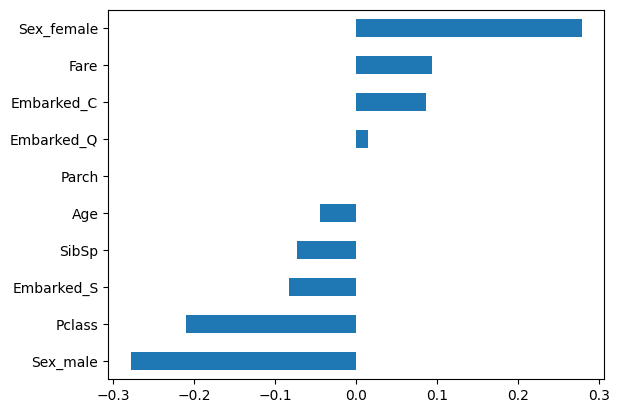

In [155]:
%matplotlib inline
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();